In [9]:
# Check original column names
print(df.columns)

# Rename columns to simpler names
df.rename(columns={
    'Province No': 'Province',
    'Approved Teacher Posts Primary': 'Approved_Primary',
    'Approved Teacher Posts Lower Secondary': 'Approved_LowerSecondary',
    'Approved Teacher Posts Secondary': 'Approved_Secondary',
    'Rahat Teacher Posts Primary': 'Rahat_Primary',
    'Rahat Teacher Posts Lower Secondary': 'Rahat_LowerSecondary',
    'Rahat Teacher Posts Secondary': 'Rahat_Secondary'
}, inplace=True)

# Confirm new column names
print(df.columns)


Index(['Province No', 'District', 'Approved Teacher Posts Primary',
       'Approved Teacher Posts Lower Secondary',
       'Approved Teacher Posts Secondary', 'Rahat Teacher Posts Primary',
       'Rahat Teacher Posts Lower Secondary', 'Rahat Teacher Posts Secondary'],
      dtype='object')
Index(['Province', 'District', 'Approved_Primary', 'Approved_LowerSecondary',
       'Approved_Secondary', 'Rahat_Primary', 'Rahat_LowerSecondary',
       'Rahat_Secondary'],
      dtype='object')


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')

# Load dataset (adjust path if needed)
df = pd.read_csv('../data/data.csv')

# View first few rows
print(df.head())

# Check data info
print(df.info())


  Province No   District  Approved Teacher Posts Primary  \
0           1  Taplejung                           937.0   
1           1  Panchthar                          1073.0   
2           1       Ilam                          1404.0   
3           1      Jhapa                          2327.0   
4           1     Morang                          2173.0   

   Approved Teacher Posts Lower Secondary  Approved Teacher Posts Secondary  \
0                                     201                               118   
1                                     203                               111   
2                                     255                               177   
3                                     425                               386   
4                                     627                               405   

   Rahat Teacher Posts Primary  Rahat Teacher Posts Lower Secondary  \
0                          202                                   87   
1                     

In [10]:
# Check missing values
print(df.isnull().sum())

# Fill missing Approved_Primary value with 0 (since it's likely 1 missing district)
df['Approved_Primary'].fillna(0, inplace=True)


Province                   0
District                   0
Approved_Primary           1
Approved_LowerSecondary    0
Approved_Secondary         0
Rahat_Primary              0
Rahat_LowerSecondary       0
Rahat_Secondary            0
dtype: int64


C:\Users\Hi-Tech\AppData\Local\Temp\ipykernel_14388\1965962197.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Approved_Primary'].fillna(0, inplace=True)


In [11]:
df['Total_Approved_Teachers'] = (
    df['Approved_Primary'] + df['Approved_LowerSecondary'] + df['Approved_Secondary']
)

# Preview
print(df[['District', 'Total_Approved_Teachers']].head())


    District  Total_Approved_Teachers
0  Taplejung                   1256.0
1  Panchthar                   1387.0
2       Ilam                   1836.0
3      Jhapa                   3138.0
4     Morang                   3205.0


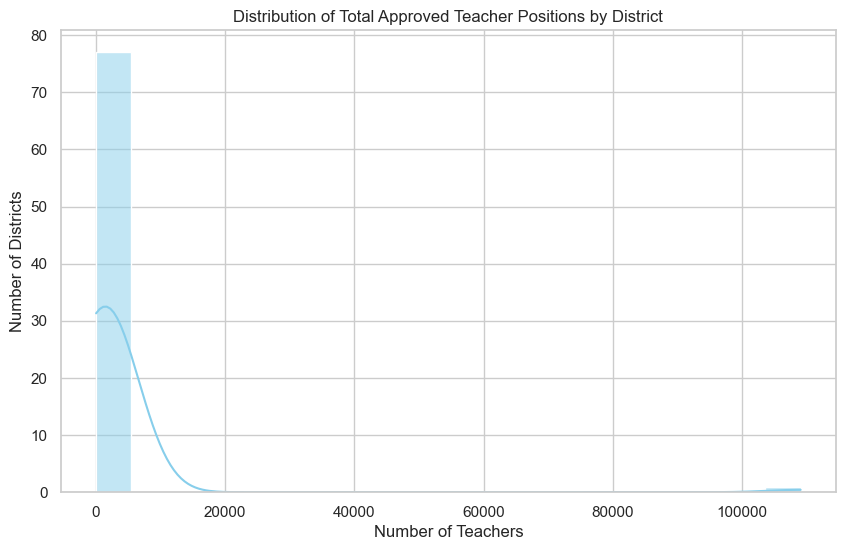

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df['Total_Approved_Teachers'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Total Approved Teacher Positions by District')
plt.xlabel('Number of Teachers')
plt.ylabel('Number of Districts')
plt.show()


C:\Users\Hi-Tech\AppData\Local\Temp\ipykernel_14388\2260995530.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='District', x='Total_Approved_Teachers', data=top10, palette='Blues_d')


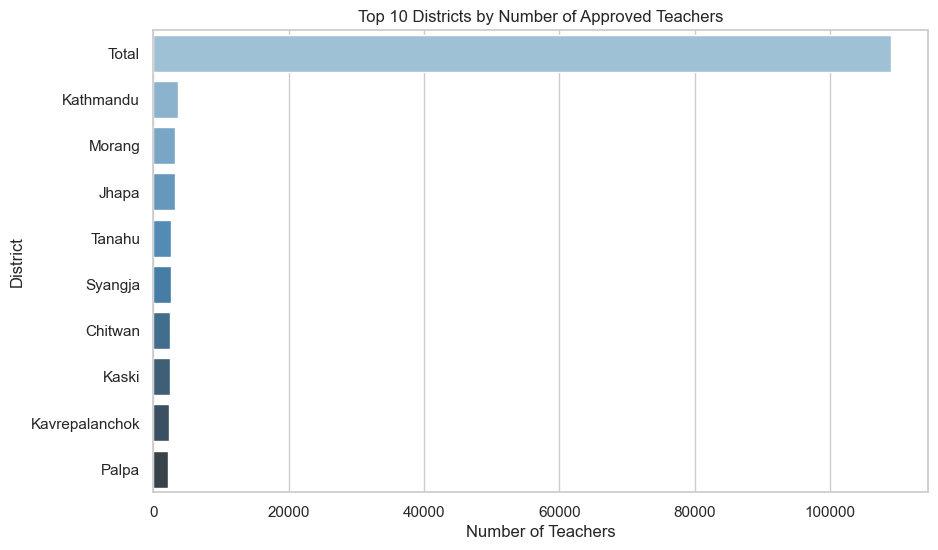

In [13]:
top10 = df.sort_values('Total_Approved_Teachers', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(y='District', x='Total_Approved_Teachers', data=top10, palette='Blues_d')
plt.title('Top 10 Districts by Number of Approved Teachers')
plt.xlabel('Number of Teachers')
plt.ylabel('District')
plt.show()


C:\Users\Hi-Tech\AppData\Local\Temp\ipykernel_14388\1393366765.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='District', x='Total_Approved_Teachers', data=bottom10, palette='Reds_d')


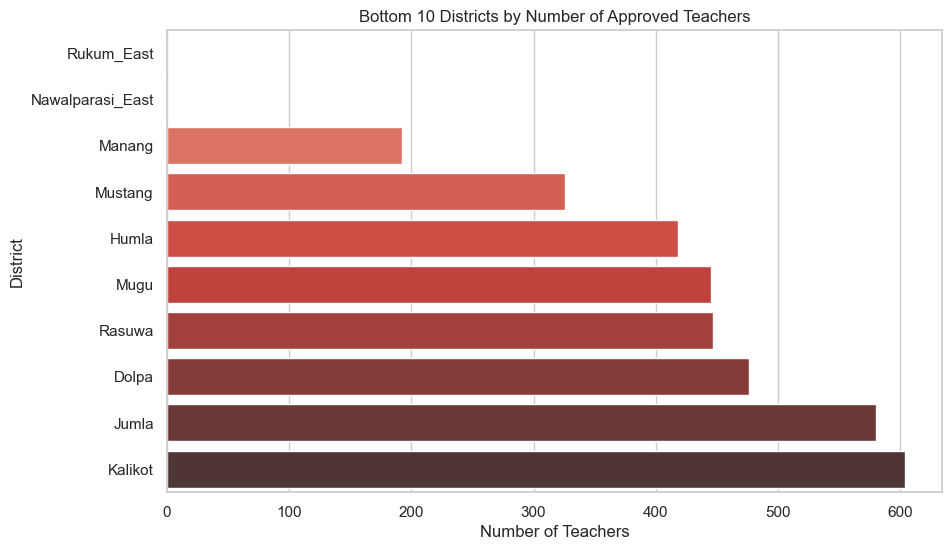

In [14]:
bottom10 = df.sort_values('Total_Approved_Teachers', ascending=True).head(10)

plt.figure(figsize=(10,6))
sns.barplot(y='District', x='Total_Approved_Teachers', data=bottom10, palette='Reds_d')
plt.title('Bottom 10 Districts by Number of Approved Teachers')
plt.xlabel('Number of Teachers')
plt.ylabel('District')
plt.show()


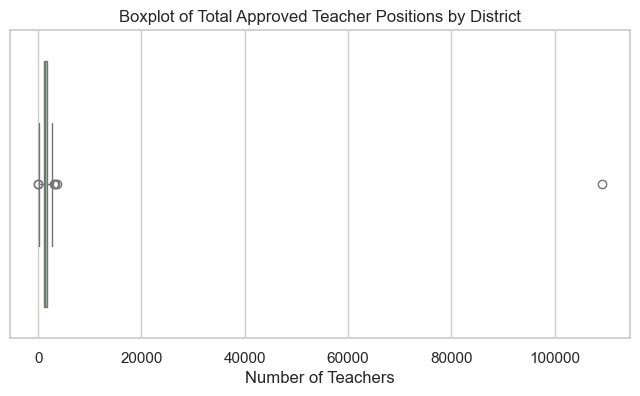

In [15]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Total_Approved_Teachers', data=df, color='lightgreen')
plt.title('Boxplot of Total Approved Teacher Positions by District')
plt.xlabel('Number of Teachers')
plt.show()
